In [3]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving abcnews-date-text.csv to abcnews-date-text (1).csv


In [5]:
datafile = r'abcnews-date-text.csv'
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

reindex_data = raw_data['headline_text']
reindex_data.index = raw_data['publish_date']

raw_data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [6]:
from pandas._libs.tslibs import vectorized
def get_top_n_words(n_top_words, count_vectorizer, text_data):
  vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
  vectorized_total = np.sum(vectorized_headlines, axis=0)
  word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
  word_values = np.flip(np.sort(vectorized_total)[0,:], 1)

  word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
  for i in range(n_top_words):
    word_vectors[i, word_indices[0, i]] = 1
  words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
  return (words, word_values[0, :n_top_words].tolist()[0])


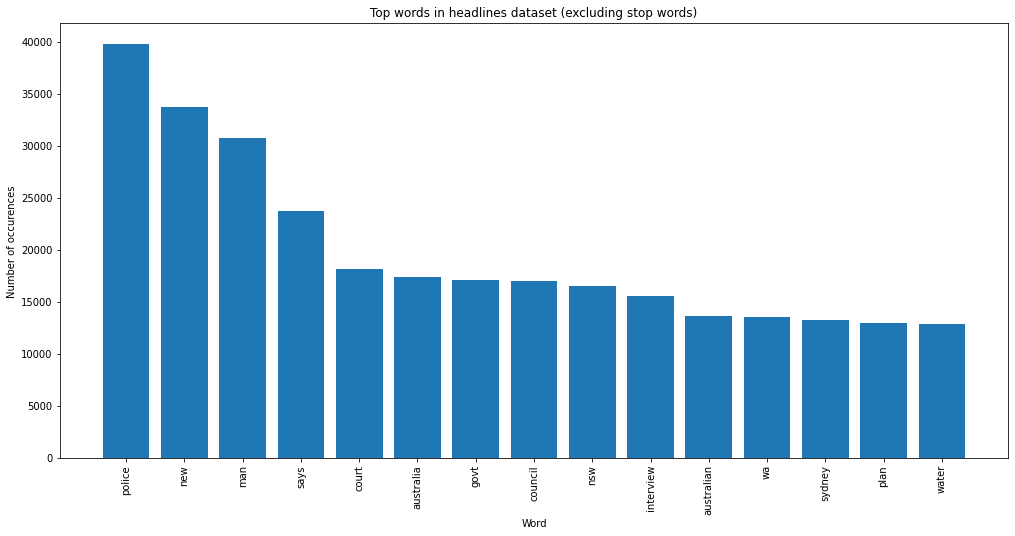

In [7]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)
words, word_values = get_top_n_words(n_top_words=15, count_vectorizer = count_vectorizer, text_data = reindex_data)
fig, ax = plt.subplots(figsize=(17, 8));
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences ');
plt.show()

In [8]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
tagged_headlines = [TextBlob(reindex_data[i]).pos_tags for i in range(reindex_data.shape[0])]


KeyboardInterrupt: ignored

In [ ]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))